# Combine Training Data and Split

## 1 Import libraries

In [1]:
print("Loading libraries...")

# Core libraries
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For gdown to download from Google Drive
import gdown

pd.set_option('display.max_colwidth', 150)
pd.set_option('display.max_columns', 50)

print("Libraries imported.\n")

Loading libraries...
Libraries imported.



## 2 Load processed datasets

Load the preprocessed Enron ham data and the CEAS_08 phishing data that were saved from previous notebooks.
These files will be downloaded from Google Drive using `gdown` if not already present in the Colab runtime.

In [2]:
# e.g., enron_ham_processed_40000.csv
ENRON_HAM_GDRIVE_FILE_ID = '1VY2Sc-U8E6hMU0XpS1i9sX5ZSCcKqh_U'

# Ensure this matches the file on Drive
ENRON_HAM_LOCAL_FILENAME = 'enron_ham_processed_40000.csv'

CEAS_PHISHING_GDRIVE_FILE_ID = '1bNkiOtPPEVxUlOhdQ5UR21W6TGHP8Bix' # e.g., ceas08_phishing_for_training_39500.csv
CEAS_PHISHING_LOCAL_FILENAME = 'ceas08_phishing_for_training_21829.csv' # Ensure this matches

# --- Function to download with gdown if file doesn't exist ---
def download_file_from_gdrive(file_id, local_filename):
    if not os.path.exists(local_filename):
        print(f"Downloading {local_filename} from Google Drive...")
        gdrive_url = f'https://drive.google.com/uc?id={file_id}'

        try:
            gdown.download(gdrive_url, local_filename, quiet=False)
            print(f"{local_filename} downloaded successfully.")

        except Exception as e:
            print(f"ERROR downloading {local_filename}: {e}. Check File ID and share settings.")
            return False

    else:
        print(f"{local_filename} already exists in Colab runtime.")

    return os.path.exists(local_filename)

# --- Load Enron Ham ---
df_enron_ham = pd.DataFrame()

if download_file_from_gdrive(ENRON_HAM_GDRIVE_FILE_ID, ENRON_HAM_LOCAL_FILENAME):
    try:
        df_enron_ham = pd.read_csv(ENRON_HAM_LOCAL_FILENAME)
        print(f"Loaded Enron ham: {ENRON_HAM_LOCAL_FILENAME}, shape: {df_enron_ham.shape}")

        if 'label' not in df_enron_ham.columns or not (df_enron_ham['label'] == 0).all():
            print("WARNING: Enron ham 'label' column missing or not all 0. Assuming it's ham and setting label=0.")
            df_enron_ham['label'] = 0

        else:
            print("Enron ham labels confirmed as 0.")

    except Exception as e:
        print(f"Error reading Enron ham CSV {ENRON_HAM_LOCAL_FILENAME}: {e}")
        df_enron_ham = pd.DataFrame() # Ensure it's empty on error

# --- Load CEAS Phishing ---
df_ceas_phishing = pd.DataFrame()
if download_file_from_gdrive(CEAS_PHISHING_GDRIVE_FILE_ID, CEAS_PHISHING_LOCAL_FILENAME):
    try:
        df_ceas_phishing = pd.read_csv(CEAS_PHISHING_LOCAL_FILENAME)
        print(f"Loaded CEAS phishing: {CEAS_PHISHING_LOCAL_FILENAME}, shape: {df_ceas_phishing.shape}")

        if 'label' not in df_ceas_phishing.columns or not (df_ceas_phishing['label'] == 1).all():
            print("WARNING: CEAS phishing 'label' column missing or not all 1. Assuming it's phishing and setting label=1.")
            df_ceas_phishing['label'] = 1

        else:
            print("CEAS phishing labels confirmed as 1.")

    except Exception as e:
        print(f"Error reading CEAS phishing CSV {CEAS_PHISHING_LOCAL_FILENAME}: {e}")
        df_ceas_phishing = pd.DataFrame() # Ensure it's empty on error

data_loaded_successfully = not df_enron_ham.empty and not df_ceas_phishing.empty

if data_loaded_successfully:
    print("\nSample of Enron ham:")
    print(df_enron_ham.head(2))
    print("\nSample of CEAS phishing:")
    print(df_ceas_phishing.head(2))

else:
    print("\nOne or more datasets could not be loaded properly. Please check filenames, GDrive IDs, and share settings.")

Downloading...
From: https://drive.google.com/uc?id=1VY2Sc-U8E6hMU0XpS1i9sX5ZSCcKqh_U
To: /content/enron_ham_processed_40000.csv
100%|██████████| 38.3M/38.3M [00:00<00:00, 68.4MB/s]


enron_ham_processed_40000.csv downloaded successfully.
Loaded Enron ham: enron_ham_processed_40000.csv, shape: (20000, 12)
Enron ham labels confirmed as 0.


Downloading...
From: https://drive.google.com/uc?id=1bNkiOtPPEVxUlOhdQ5UR21W6TGHP8Bix
To: /content/ceas08_phishing_for_training_21829.csv
100%|██████████| 13.0M/13.0M [00:00<00:00, 54.4MB/s]


ceas08_phishing_for_training_21829.csv downloaded successfully.
Loaded CEAS phishing: ceas08_phishing_for_training_21829.csv, shape: (21829, 9)
CEAS phishing labels confirmed as 1.

Sample of Enron ham:
              original_file                                     message_id  \
0   shackleton-s/sent/1912.  <21013688.1075844564560.JavaMail.evans@thyme>   
1  farmer-d/logistics/1066.  <22688499.1075854130303.JavaMail.evans@thyme>   

                   date_time               from_address  \
0  2000-08-29 01:26:00-07:00  sara.shackleton@enron.com   
1  2000-04-24 05:43:00-07:00       pat.clynes@enron.com   

                   to_address           subject_original  \
0  william.bradford@enron.com     Re: Credit Derivatives   
1      aimee.lannou@enron.com  Meter #1591 Lamay Gaslift   

            subject_cleaned  \
0     re credit derivatives   
1  meter 1591 lamay gaslift   

                                                                                                             

## 3 Combine datasets

Concatenate the Enron ham and CEAS phishing DataFrames.
Ensure they have compatible columns, primarily 'body_cleaned', 'subject_cleaned' (if available in both), and 'label'.

Using 'body_cleaned', 'subject_cleaned', and 'label' columns.
Combined dataset shape: (41829, 3)
Combined dataset head:
                                                                                                                                            body_cleaned  \
0  htmlheadtitleuntitled documenttitle meta content"texthtml charsetiso88591" meta content"mshtml 5.50.4807.2300" namegeneratorhead body bgcolorfffff...   
1   thanks !!!!!!!!!!!!!!!!! debra perlingiere enron north america corp. 1400 smith street, eb 3885 houston, texas 77002 phone 7138537658 fax 7136463490   
2                                                                                                   ignore my comment about being a one day deal! sorry!   
3  dorie, as per our discussion. for the friday night speaker, can you give me an idea of price and availability for the following  joe gibbs  lou ho...   
4  these customer letters just prove how good our maxherbal pills are ! just read what our satisfied

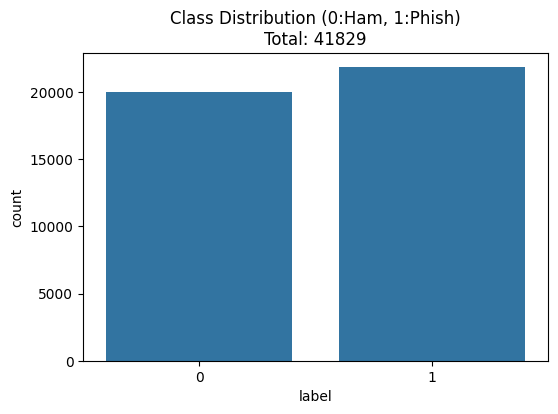

In [3]:
df_combined = pd.DataFrame()

if data_loaded_successfully:
    # Identify common text columns to keep.
    # Assume 'body_cleaned' and 'label' are essential and exist.
    # Check for 'subject_cleaned' and include if present in both.
    common_cols = ['body_cleaned', 'label']

    # Check if 'subject_cleaned' is in both and add it
    if 'subject_cleaned' in df_enron_ham.columns and 'subject_cleaned' in df_ceas_phishing.columns:
        common_cols.append('subject_cleaned')
        print("Using 'body_cleaned', 'subject_cleaned', and 'label' columns.")

    elif 'subject_cleaned' in df_enron_ham.columns and 'subject_cleaned' not in df_ceas_phishing.columns:
        print("Warning: 'subject_cleaned' found in Enron but not CEAS. Proceeding with 'body_cleaned' and 'label'.")

    elif 'subject_cleaned' not in df_enron_ham.columns and 'subject_cleaned' in df_ceas_phishing.columns:
        print("Warning: 'subject_cleaned' found in CEAS but not Enron. Proceeding with 'body_cleaned' and 'label'.")
        # df_enron_ham['subject_cleaned'] = ""

    else:
        print("Using 'body_cleaned' and 'label' columns. 'subject_cleaned' not found in one or both.")

    # Ensure only existing columns are selected to avoid errors
    enron_cols_to_select = [col for col in common_cols if col in df_enron_ham.columns]
    ceas_cols_to_select = [col for col in common_cols if col in df_ceas_phishing.columns]

    if not all(col in enron_cols_to_select for col in ['body_cleaned', 'label']):
         print("ERROR: Essential columns 'body_cleaned' or 'label' missing in Enron ham after selection.")

    elif not all(col in ceas_cols_to_select for col in ['body_cleaned', 'label']):
         print("ERROR: Essential columns 'body_cleaned' or 'label' missing in CEAS phishing after selection.")

    else:
        enron_subset = df_enron_ham[enron_cols_to_select].copy()
        ceas_subset = df_ceas_phishing[ceas_cols_to_select].copy()

        # Ensure both subsets have the same columns before concat, fill missing with empty string if one has subject and other doesn't
        all_intended_cols = ['body_cleaned', 'label']

        if 'subject_cleaned' in common_cols:
            all_intended_cols.append('subject_cleaned')

        for df_subset in [enron_subset, ceas_subset]:
            for col in all_intended_cols:
                if col not in df_subset.columns:
                    df_subset[col] = "" # Add missing column with empty strings


        df_combined = pd.concat([enron_subset, ceas_subset], ignore_index=True)
        df_combined = df_combined.sample(frac=1, random_state=42).reset_index(drop=True) # Shuffle

        print(f"Combined dataset shape: {df_combined.shape}")
        print("Combined dataset head:")
        print(df_combined.head())
        print("\nLabel distribution in combined dataset:")
        class_distribution = df_combined['label'].value_counts(normalize=True)
        print(class_distribution)

        plt.figure(figsize=(6,4))
        sns.countplot(x='label', data=df_combined)
        plt.title(f'Class Distribution (0:Ham, 1:Phish)\nTotal: {len(df_combined)}')
        plt.show()

else:
    print("Cannot combine datasets as one or both were not loaded successfully or are empty.")

## 4 Check class balance

In [4]:
if not df_combined.empty:
    balance = df_combined['label'].value_counts(normalize=True)
    print(f"Current class balance in combined dataset:\n{balance}")
    ham_percentage = balance.get(0, 0)
    phish_percentage = balance.get(1, 0)

    # e.g., if difference is less than 5%
    if abs(ham_percentage - phish_percentage) < 0.05:
        print("Dataset appears to be well-balanced or nearly balanced.")
        print("SMOTE for class balancing might not be strictly necessary.")

    else:
        print("Some class imbalance detected. SMOTE could be considered on the training set after feature engineering if performance on minority class is poor.")

else:
    print("Combined dataset is empty. Cannot check balance.")

Current class balance in combined dataset:
label
1    0.521863
0    0.478137
Name: proportion, dtype: float64
Dataset appears to be well-balanced or nearly balanced.
SMOTE for class balancing might not be strictly necessary.


## 5 Split data into training, validation, and test sets

Split the combined dataset into 70% training, 15% validation, and 15% test sets.
Stratification will be used to maintain class proportions in each split.

In [5]:
df_train = pd.DataFrame()
df_val = pd.DataFrame()
df_test = pd.DataFrame()

if not df_combined.empty:
    # Define features (X) and target (y)
    # Use all available text columns for X at this stage.
    # Feature engineering will later decide how to combine/use them.
    feature_columns_for_split = []
    if 'body_cleaned' in df_combined.columns: feature_columns_for_split.append('body_cleaned')
    if 'subject_cleaned' in df_combined.columns: feature_columns_for_split.append('subject_cleaned')
    # Add other original columns if you plan to use them as features (e.g., 'sender', 'urls_list_parsed')
    # For now, sticking to text features for splitting demonstration

    if not feature_columns_for_split:
        print("ERROR: No feature columns ('body_cleaned' or 'subject_cleaned') found in df_combined.")

    else:
        X = df_combined[feature_columns_for_split]
        y = df_combined['label']

        # First split: 70% train, 30% temp (for validation + test)
        X_train, X_temp, y_train, y_temp = train_test_split(
            X, y, test_size=0.30, random_state=42, stratify=y
        )

        # Second split: Split temp into 50% validation, 50% test
        X_val, X_test, y_val, y_test = train_test_split(
            X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp
        )

        print(f"Original dataset shape: {df_combined.shape} (X: {X.shape}, y: {y.shape})")
        print(f"Training set shape: X_train: {X_train.shape}, y_train: {y_train.shape}")
        print(f"Validation set shape: X_val: {X_val.shape}, y_val: {y_val.shape}")
        print(f"Test set shape: X_test: {X_test.shape}, y_test: {y_test.shape}")

        print("\nTraining set label distribution:"); print(y_train.value_counts(normalize=True))
        print("\nValidation set label distribution:"); print(y_val.value_counts(normalize=True))
        print("\nTest set label distribution:"); print(y_test.value_counts(normalize=True))

        # Reconstruct DataFrames for saving
        df_train = X_train.copy(); df_train['label'] = y_train
        df_val = X_val.copy(); df_val['label'] = y_val
        df_test = X_test.copy(); df_test['label'] = y_test

else:
    print("Combined DataFrame is empty. Cannot split.")

Original dataset shape: (41829, 3) (X: (41829, 2), y: (41829,))
Training set shape: X_train: (29280, 2), y_train: (29280,)
Validation set shape: X_val: (6274, 2), y_val: (6274,)
Test set shape: X_test: (6275, 2), y_test: (6275,)

Training set label distribution:
label
1    0.521858
0    0.478142
Name: proportion, dtype: float64

Validation set label distribution:
label
1    0.521836
0    0.478164
Name: proportion, dtype: float64

Test set label distribution:
label
1    0.521912
0    0.478088
Name: proportion, dtype: float64


## 6 Save split datasets

Save the training, validation, and test sets as separate CSV files. These will be the inputs for feature engineering and model training.

In [6]:
if not df_train.empty and not df_val.empty and not df_test.empty:
    try:
        df_train.to_csv('train_corpus.csv', index=False)
        df_val.to_csv('validation_corpus.csv', index=False)
        df_test.to_csv('test_corpus.csv', index=False)
        print("Train, validation, and test sets saved to Colab runtime as CSV files:")
        print(" - /content/train_corpus.csv")
        print(" - /content/validation_corpus.csv")
        print(" - /content/test_corpus.csv")
        print("IMPORTANT: These files are temporary. Download or save to Google Drive for persistence.")

    except Exception as e:
        print(f"Error saving split datasets: {e}")

else:
    print("One or more split DataFrames (train, val, test) are empty. Nothing to save.")

Train, validation, and test sets saved to Colab runtime as CSV files:
 - /content/train_corpus.csv
 - /content/validation_corpus.csv
 - /content/test_corpus.csv
IMPORTANT: These files are temporary. Download or save to Google Drive for persistence.
